## This notebook is the code-a-long from the video of Micrograd!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

f(3.0)

20.0

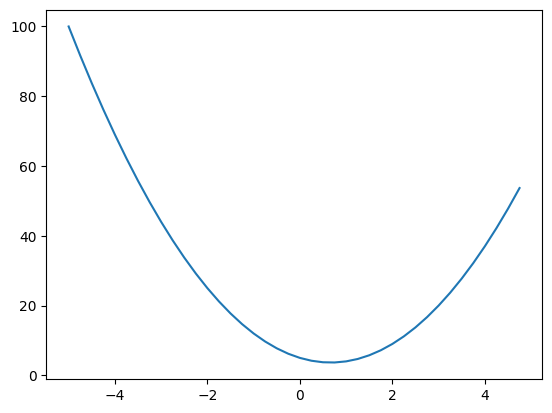

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
h = 0.0000000001
x = 2/3 
(f(x + h) - f(x))/h

0.0

In [5]:
# Lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [6]:
h = 0.00001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c
print(d1)
print(d2)
print('slope', (d2 - d1)/h)

4.0
3.9999699999999994
slope -3.000000000064062


### From here we start constructing micrograd ourself from scratch

In [7]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self ,other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad

        out._backward = _backward
        return out
    




In [8]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(4, label='c')
e = a*b; e.label='e'
d = e + c;  d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'


In [37]:
import os

# Voeg de map van 'dot' toe aan PATH binnen Python
os.environ["PATH"] += os.pathsep + "/opt/local/bin"

# Daarna pas graphviz gebruiken
from graphviz import Digraph

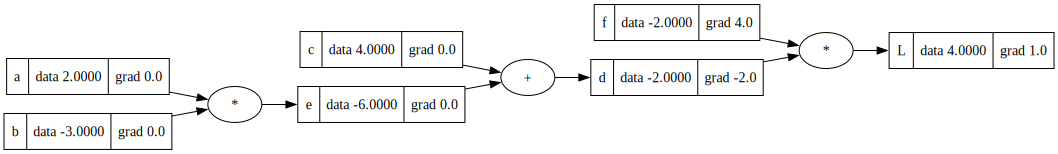

In [ ]:



def trace(root):
    # build a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={"rankdir": "LR"}) # LR is left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectengular node for it

        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4r }" % (n.label, n.data, n.grad), shape="record")
        if n._op:
            # if this value is a result of some operation then create a op node 
            dot.node(name = uid + n._op, label = n._op)
            # and connect the node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

draw_dot(L)

WANT: 
dL / dc = **(dL / dd) * (dd / dc)**

KNOW:
dL / dd
dd / dc

In [23]:
L.grad = 1.00
f.grad = 4.0
d.grad = -2.0

In [24]:
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(4, label='c')
    e = a*b; e.label='e'
    d = e + c;  d.label='d'
    f = Value(-2.0, label='f')
    L = d*f; L.label='L'
    L1 = L.data

    a = Value(2.0 + h, label='a')
    b = Value(-3.0, label='b')
    c = Value(4, label='c')
    e = a*b; e.label='e'
    d = e + c;  d.label='d'
    f = Value(-2.0 +h, label='f')
    L = d*f; L.label='L'
    L2 = L.data

    print((L2 - L1) / h)

lol()

3.9970000000000283


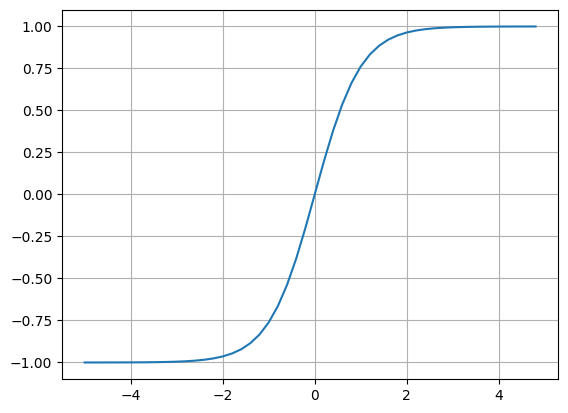

In [25]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))) 
plt.grid()

In [26]:
# inputs x1, x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1, w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# Bias
b = Value(6.7, label="b")
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2*w2; x2w2.label = "x2*w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1 + x2w2"

n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label="o"


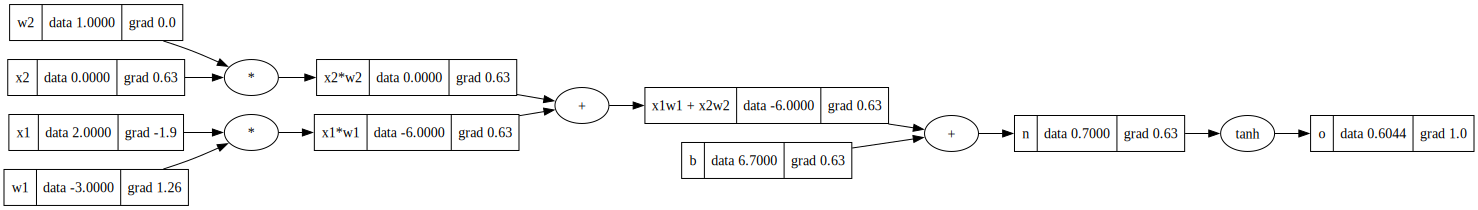

In [36]:
draw_dot(o)

In [28]:
o.grad = 1.0
o._backward()

In [30]:
n._backward()

In [34]:
b._backward()
x2w2._backward()
x1w1._backward()

In [35]:
x1w1x2w2._backward()